In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random as rnd
import shap
import xgboost

In [2]:
data = pd.read_csv('data/X_train.csv', index_col='PassengerId')

In [3]:
y = data["Survived"]
X = data.drop('Survived', axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [5]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred)
logreg_acc

0.8435754189944135

In [23]:
(pd.DataFrame(logreg.coef_, index=['Correlation'], columns=X.columns).
 T.sort_values(by='Correlation', ascending=False))

,Correlation
Pclass,2.603612
is_4_members,2.037960
is_alone,1.910149
is_3or2_members,1.793999
label_SOTON,1.046347
age*class,0.746754
status_Mrs,0.458487
cabin_type_D,0.399427
cabin_type_E,0.298667
quad_fare,0.000009


### SGDCliassifier

In [24]:
from sklearn.linear_model import SGDClassifier


sgdc = SGDClassifier(max_iter=10000, 
                     learning_rate='optimal', 
                     random_state=13, alpha=0.01, 
                     loss='log_loss', penalty='l1')
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_test)
accuracy_score(y_test, y_pred)

0.6536312849162011

### Ridge Classifier

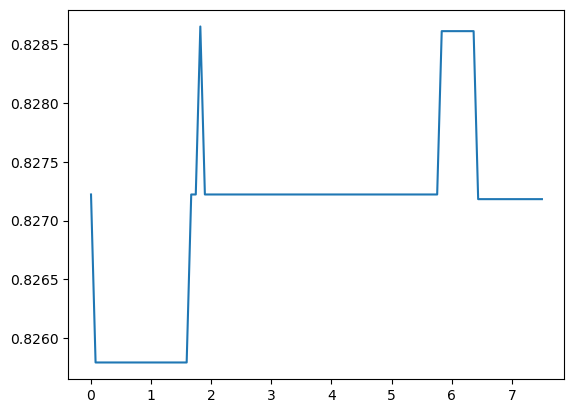

In [25]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import matplotlib.pyplot as plt


def train_grid_search(X, y):
    
    grid_searcher = GridSearchCV(RidgeClassifier(random_state=123),
                             param_grid={'alpha': np.linspace(0.001, 7.5, 100)},
                             cv=KFold(n_splits=20, random_state=10, shuffle=True), 
                             n_jobs=-1,)
    grid_searcher.fit(X, y)
    return grid_searcher.cv_results_['mean_test_score']

plt.plot(np.linspace(0.001, 7.5, 100), train_grid_search(X_train, y_train))

In [26]:
ridge = RidgeClassifier(alpha=4, random_state=123)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
svc_acc

0.8547486033519553

### Support Vector Machines

In [27]:
from sklearn.svm import SVC, LinearSVC


svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
svc_acc

0.7094972067039106

### KNeighborsClassifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

gs = GridSearchCV(KNeighborsClassifier(n_jobs=-1),
                  param_grid={'n_neighbors': range(1, 40, 2),
                              'weights': ['uniform', 'distance'],
                              'p': [1, 2, 3], 
                              'leaf_size': [10, 20, 30, 40, 50]},
                  cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [29]:
print(f'accuracy - {accuracy_score(y_test, gs.predict(X_test))}')

accuracy - 0.8044692737430168


In [30]:
gs.best_params_

{'leaf_size': 10, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

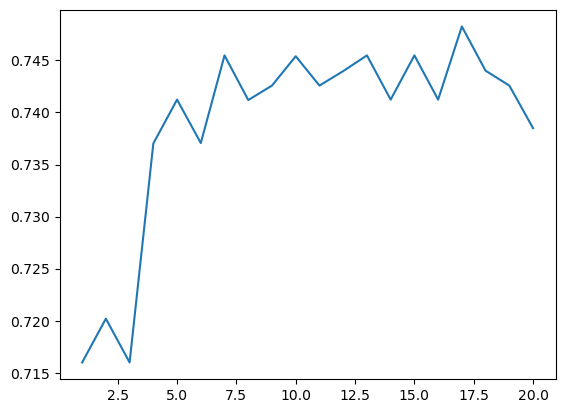

In [31]:
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import matplotlib.pyplot as plt


def train_grid_search(X, y):
    
    grid_searcher = GridSearchCV(KNeighborsClassifier(**{'leaf_size': 10, 
                                                         'p': 1, 
                                                         'weights': 'distance'}),
                             param_grid={'n_neighbors': range(1, 21)},
                             cv=KFold(n_splits=20, random_state=10, shuffle=True), 
                             n_jobs=-1,)
    grid_searcher.fit(X, y)
    return grid_searcher.cv_results_['mean_test_score']

plt.plot(np.arange(1, 21), train_grid_search(X_train, y_train))

In [32]:
knn = KNeighborsClassifier(n_neighbors=19, **{'leaf_size': 10, 
                                              'p': 1, 
                                              'weights': 'distance'})
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.8268156424581006

### GaussianNB

In [33]:
from sklearn.naive_bayes import GaussianNB


gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gaussian_acc = accuracy_score(y_test, y_pred)
gaussian_acc

0.7374301675977654

### Perceptron

In [34]:
from sklearn.linear_model import Perceptron


perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
perceptron_acc = accuracy_score(y_test, y_pred)
perceptron_acc

0.3743016759776536

### Linear SVC

In [35]:
from sklearn.svm import SVC, LinearSVC


linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc_acc = accuracy_score(y_test, y_pred)
linear_svc_acc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7653631284916201

### Stochastic Gradient Descent

In [36]:
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, y_pred)
sgd_acc

0.3743016759776536

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred)
acc_decision_tree

0.8547486033519553

### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred)
acc_random_forest

0.8491620111731844

### XGBoost

In [41]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_train)

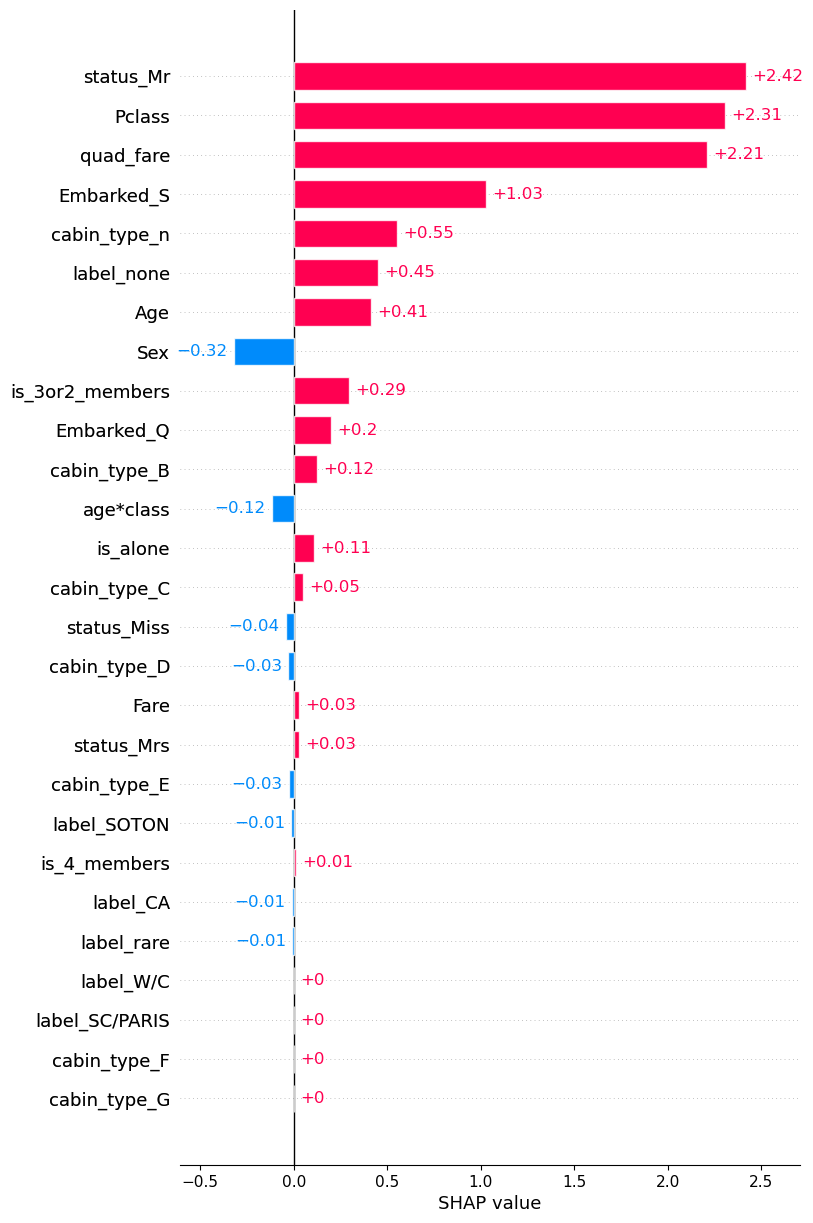

In [44]:
shap.plots.bar(shap_values[0], max_display=50)

In [46]:
accuracy_score(y_test, xgb.predict(X_test))

0.8491620111731844

### Градиентный бустинг

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [48]:
gbdt = GradientBoostingClassifier(random_state=123)
kfold = KFold(n_splits=4, shuffle=True, random_state=123)

In [49]:
param_grid = {
    "max_depth": [2, 3],
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    # "min_child_weight":[4, 5, 6],
    "subsample": [0.7, 0.8, 0.9]
}

In [50]:
CV_gbdt = GridSearchCV(estimator=gbdt, param_grid=param_grid,
                      scoring='accuracy', cv=kfold, verbose=1000)

In [51]:
CV_gbdt.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV 1/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7
[CV 1/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7;, score=0.815 total time=   0.0s
[CV 2/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7
[CV 2/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7;, score=0.775 total time=   0.0s
[CV 3/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7
[CV 3/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7;, score=0.803 total time=   0.0s
[CV 4/4; 1/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7
[CV 4/4; 1/54] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7;, score=0.770 total time=   0.0s
[CV 1/4; 2/54] START learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.8
[CV 1/4; 2/54] END learning_rate=0.01, max_depth=

[CV 2/4; 11/54] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.775 total time=   0.0s
[CV 3/4; 11/54] START learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8
[CV 3/4; 11/54] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.803 total time=   0.0s
[CV 4/4; 11/54] START learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8
[CV 4/4; 11/54] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.770 total time=   0.0s
[CV 1/4; 12/54] START learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9
[CV 1/4; 12/54] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.809 total time=   0.0s
[CV 2/4; 12/54] START learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9
[CV 2/4; 12/54] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9;, score=0.775 total time=   0.0s
[CV 3/4; 12/54] START learning_rate=0.01, max_depth=3, n_estimators=50,

[CV 4/4; 21/54] END learning_rate=0.05, max_depth=2, n_estimators=50, subsample=0.9;, score=0.775 total time=   0.0s
[CV 1/4; 22/54] START learning_rate=0.05, max_depth=2, n_estimators=100, subsample=0.7
[CV 1/4; 22/54] END learning_rate=0.05, max_depth=2, n_estimators=100, subsample=0.7;, score=0.837 total time=   0.0s
[CV 2/4; 22/54] START learning_rate=0.05, max_depth=2, n_estimators=100, subsample=0.7
[CV 2/4; 22/54] END learning_rate=0.05, max_depth=2, n_estimators=100, subsample=0.7;, score=0.815 total time=   0.0s
[CV 3/4; 22/54] START learning_rate=0.05, max_depth=2, n_estimators=100, subsample=0.7
[CV 3/4; 22/54] END learning_rate=0.05, max_depth=2, n_estimators=100, subsample=0.7;, score=0.803 total time=   0.0s
[CV 4/4; 22/54] START learning_rate=0.05, max_depth=2, n_estimators=100, subsample=0.7
[CV 4/4; 22/54] END learning_rate=0.05, max_depth=2, n_estimators=100, subsample=0.7;, score=0.770 total time=   0.0s
[CV 1/4; 23/54] START learning_rate=0.05, max_depth=2, n_estima

[CV 1/4; 32/54] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=0.837 total time=   0.0s
[CV 2/4; 32/54] START learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8
[CV 2/4; 32/54] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=0.815 total time=   0.0s
[CV 3/4; 32/54] START learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8
[CV 3/4; 32/54] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=0.831 total time=   0.0s
[CV 4/4; 32/54] START learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8
[CV 4/4; 32/54] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8;, score=0.781 total time=   0.0s
[CV 1/4; 33/54] START learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9
[CV 1/4; 33/54] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9;, score=0.843 total time=   0.0s
[CV 2/4; 33/54] START learning_rate=0.05, max_depth=3, n_estim

[CV 4/4; 42/54] END learning_rate=0.1, max_depth=2, n_estimators=100, subsample=0.9;, score=0.781 total time=   0.0s
[CV 1/4; 43/54] START learning_rate=0.1, max_depth=2, n_estimators=150, subsample=0.7
[CV 1/4; 43/54] END learning_rate=0.1, max_depth=2, n_estimators=150, subsample=0.7;, score=0.843 total time=   0.0s
[CV 2/4; 43/54] START learning_rate=0.1, max_depth=2, n_estimators=150, subsample=0.7
[CV 2/4; 43/54] END learning_rate=0.1, max_depth=2, n_estimators=150, subsample=0.7;, score=0.803 total time=   0.0s
[CV 3/4; 43/54] START learning_rate=0.1, max_depth=2, n_estimators=150, subsample=0.7
[CV 3/4; 43/54] END learning_rate=0.1, max_depth=2, n_estimators=150, subsample=0.7;, score=0.820 total time=   0.0s
[CV 4/4; 43/54] START learning_rate=0.1, max_depth=2, n_estimators=150, subsample=0.7
[CV 4/4; 43/54] END learning_rate=0.1, max_depth=2, n_estimators=150, subsample=0.7;, score=0.770 total time=   0.0s
[CV 1/4; 44/54] START learning_rate=0.1, max_depth=2, n_estimators=150,

[CV 2/4; 53/54] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8;, score=0.815 total time=   0.1s
[CV 3/4; 53/54] START learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8
[CV 3/4; 53/54] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8;, score=0.843 total time=   0.1s
[CV 4/4; 53/54] START learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8
[CV 4/4; 53/54] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8;, score=0.787 total time=   0.1s
[CV 1/4; 54/54] START learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.9
[CV 1/4; 54/54] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.9;, score=0.837 total time=   0.1s
[CV 2/4; 54/54] START learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.9
[CV 2/4; 54/54] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.9;, score=0.815 total time=   0.1s
[CV 3/4; 54/54] START learning_rate=0.1, max_depth=3, n_estimators=150,

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=123),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3], 'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=1000)

In [52]:
CV_gbdt.best_score_

0.8258426966292135

In [53]:
bp = CV_gbdt.best_params_
bp

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}

In [58]:
from sklearn.metrics import accuracy_score


gbc = GradientBoostingClassifier(random_state=123, 
                                 **bp)
gbc.fit(X_train.drop(['cabin_type_G', 'cabin_type_F'], axis=1), y_train)

print(f"Accuracy на тренировочной выборке - {accuracy_score(y_train, gbc.predict(X_train.drop(['cabin_type_G', 'cabin_type_F'], axis=1)))}")
print(f"Accuracy на тестовой выборке - {accuracy_score(y_test, gbc.predict(X_test.drop(['cabin_type_G', 'cabin_type_F'], axis=1)))}")

Accuracy на тренировочной выборке - 0.9157303370786517
Accuracy на тестовой выборке - 0.8715083798882681


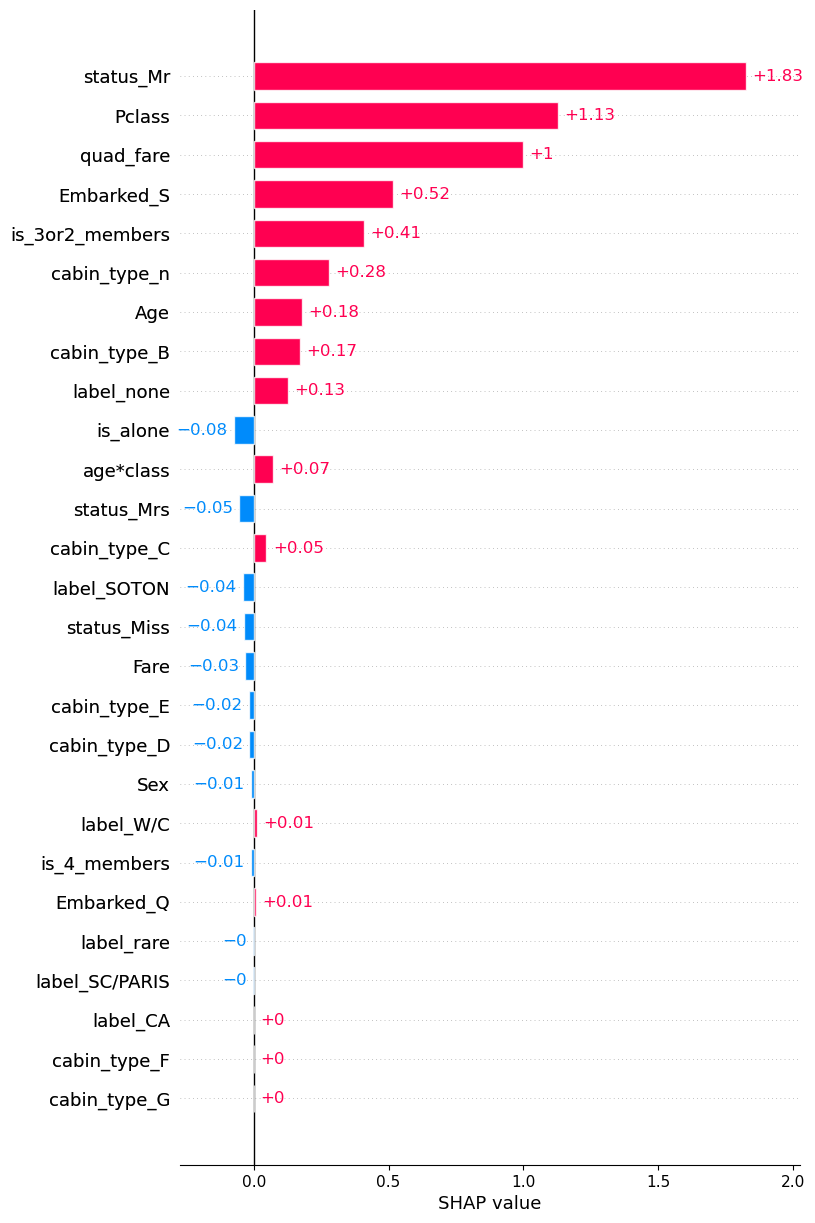

In [56]:
explainer = shap.Explainer(gbc, X_test)
shap_values = explainer(X_train)
shap.plots.bar(shap_values[0], max_display=50)

### Рандом форест

In [87]:
from sklearn.ensemble import RandomForestClassifier

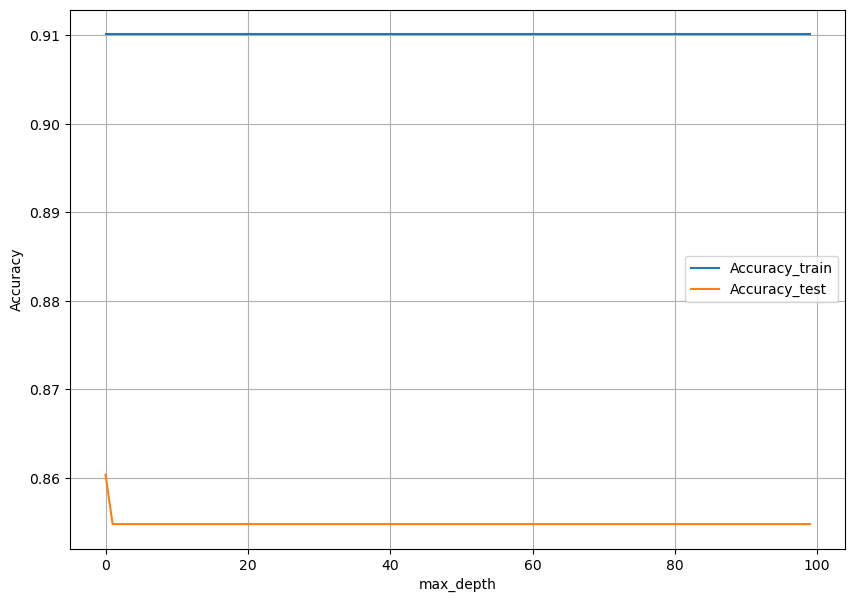

In [88]:
max_depth = 150
train_loss = []
test_loss = []

for i in range(50, max_depth):
    rf = RandomForestClassifier(n_estimators=i, max_depth=15, random_state=123, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_loss.append(accuracy_score(y_train, rf.predict(X_train)))
    test_loss.append(accuracy_score(y_test, rf.predict(X_test)))
    
plt.figure(figsize = (10, 7))
plt.grid()
plt.plot(train_loss, label = 'Accuracy_train')
plt.plot(test_loss, label = 'Accuracy_test')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend();

In [89]:
param_grid = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], 
              "n_estimators": [50, 100, 400, 700, 1000]}

rf = RandomForestClassifier(random_state=123, n_jobs=-1)
kfold = KFold(n_splits=4, shuffle=True, random_state=123)

CVrf = GridSearchCV(estimator=rf, param_grid=param_grid,
                      scoring='accuracy', cv=kfold, verbose=1000)
CVrf.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
[CV 1/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.792 total time=   3.1s
[CV 2/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.787 total time=   0.0s
[CV 3/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.815 total time=   0.0s
[CV 4/4; 1/150] START criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/4; 1/150] END criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.758 total time=   0.0s
[CV 1/4; 2/150] START criterion=gini, min_samples_lea

GridSearchCV(cv=KFold(n_splits=4, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000]},
             scoring='accuracy', verbose=1000)

In [90]:
CVrf.best_score_

0.800561797752809

In [91]:
CVrf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 100}

In [97]:
rfc = RandomForestClassifier(max_depth=9, **{'criterion': 'entropy',
                                             'min_samples_leaf': 1,
                                             'min_samples_split': 16,
                                             'n_estimators': 300})
rfc.fit(X_train, y_train)

print(f"Accuracy_train: {accuracy_score(y_train, rfc.predict(X_train))}")
print(f"Accuracy_test: {accuracy_score(y_test, rfc.predict(X_test))}")

Accuracy_train: 0.8553370786516854
Accuracy_test: 0.8603351955307262


In [98]:
cols = X_train.columns
pd.DataFrame(rfc.feature_importances_, index=cols).sort_values(0, ascending=False)

,0
status,0.245094
Sex,0.236482
Pclass,0.107310
age*class,0.082492
Fare,0.066731
cabin_type_n,0.055167
Age,0.044288
Embarked,0.028294
is_alone,0.025109
label_none,0.016925


In [99]:
X_train

,Pclass,Sex,Age,Fare,Embarked,status,is_alone,age*class,label_CA,label_SC/PARIS,...,label_W/C,label_none,label_rare,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_n
PassengerId,,,,,,,,,,,,,,,,,,,,,
330,1,1,0,3,1,2,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
750,3,0,1,0,2,1,1,3,0,0,...,0,1,0,0,0,0,0,0,0,1
204,3,0,2,0,1,1,1,6,0,0,...,0,1,0,0,0,0,0,0,0,1
422,3,0,1,0,2,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,1
98,1,0,1,3,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2,1,2,2,0,3,0,4,0,0,...,0,1,0,0,0,0,0,0,0,1
323,2,1,1,1,2,2,1,2,0,0,...,0,1,0,0,0,0,0,0,0,1
383,3,0,1,1,0,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,1
